In [1]:
import numpy as np
import os
import pickle
import trueskill

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
%matplotlib inline

CONFIDENCE_INTERVAL = 68

In [2]:
# Customize matplotlib appearance
sns.set_style("white", {'axes.grid': False, 'grid.color': '.9', 'grid.linestyle': u'--'})
matplotlib.rc('axes', titlesize=18, labelsize=18)
matplotlib.rc('legend', fontsize=16)
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16)

# matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

# IPD

## Load results

In [25]:
runs = 5

# Naive learners
rets_nl, times_nl, params_nl = {}, {}, {}
for bs in [64]:
    rets_nl[bs] = np.stack([np.load("results/ipd_bs%d_nl/run-%d/rets.npy" % (bs, r + 1)) for r in range(runs)])
    times_nl[bs] = np.stack([np.load("results/ipd_bs%d_nl/run-%d/times.npy" % (bs, r + 1)) for r in range(runs)])
    params_nl[bs] = np.stack([np.load("results/ipd_bs%d_nl/run-%d/params.npy" % (bs, r + 1)) for r in range(runs)])

# LOLA with corrections
rets_old, times_old, params_old = {}, {}, {}
for bs in [64]:
    rets_old[bs] = np.stack([np.load("results/ipd_bs%d_original/run-%d/rets.npy" % (bs, r + 1))[:200] for r in range(runs)])
    params_old[bs] = np.stack([np.load("results/ipd_bs%d_original/run-%d/params.npy" % (bs, r + 1))[:200] for r in range(runs)])

# LOLA without magic
rets_nomagic, times_nomagic, params_nomagic = {}, {}, {}
for bs in [64]:
    rets_nomagic[bs] = np.stack([np.load("results/ipd_bs%d_nomagic/run-%d/rets.npy" % (bs, r + 1)) for r in range(runs)])
    times_nomagic[bs] = np.stack([np.load("results/ipd_bs%d_nomagic/run-%d/times.npy" % (bs, r + 1)) for r in range(runs)])
    params_nomagic[bs] = np.stack([np.load("results/ipd_bs%d_nomagic/run-%d/params.npy" % (bs, r + 1)) for r in range(runs)])

# LOLA with magic
rets_magic, times_magic, params_magic = {}, {}, {}
for bs in [64]:
    rets_magic[bs] = np.stack([np.load("results/ipd_bs%d_magic/run-%d/rets.npy" % (bs, r + 1)) for r in range(runs)])
    times_magic[bs] = np.stack([np.load("results/ipd_bs%d_magic/run-%d/times.npy" % (bs, r + 1)) for r in range(runs)])
    params_magic[bs] = np.stack([np.load("results/ipd_bs%d_magic/run-%d/params.npy" % (bs, r + 1)) for r in range(runs)])

rets_2steps_magic, times_2steps_magic, params_2steps_magic = {}, {}, {}
for bs in [64]:
    rets_2steps_magic[bs] = np.stack([np.load("results/ipd_bs%d_2inner/run-%d/rets.npy" % (bs, r + 1)) for r in range(runs)])
    times_2steps_magic[bs] = np.stack([np.load("results/ipd_bs%d_2inner/run-%d/times.npy" % (bs, r + 1)) for r in range(runs)])
    params_2steps_magic[bs] = np.stack([np.load("results/ipd_bs%d_2inner/run-%d/params.npy" % (bs, r + 1)) for r in range(runs)])

rets_3steps_magic, times_3steps_magic, params_3steps_magic = {}, {}, {}
for bs in [64]:
    rets_3steps_magic[bs] = np.stack([np.load("results/ipd_bs%d_3inner/run-%d/rets.npy" % (bs, r + 1)) for r in range(runs)])
    times_3steps_magic[bs] = np.stack([np.load("results/ipd_bs%d_3inner/run-%d/times.npy" % (bs, r + 1)) for r in range(runs)])
    params_3steps_magic[bs] = np.stack([np.load("results/ipd_bs%d_3inner/run-%d/params.npy" % (bs, r + 1)) for r in range(runs)])

# LOLA with magic and OM
rets_2steps_magic_om, times_2steps_magic_om, params_2steps_magic_om = {}, {}, {}
for bs in [64]:
    rets_2steps_magic_om[bs] = np.stack([np.load("results/ipd_bs%d_2inner_om/run-%d/rets.npy" % (bs, r + 1)) for r in range(runs)])
    times_2steps_magic_om[bs] = np.stack([np.load("results/ipd_bs%d_2inner_om/run-%d/times.npy" % (bs, r + 1)) for r in range(runs)])
    params_2steps_magic_om[bs] = np.stack([np.load("results/ipd_bs%d_2inner_om/run-%d/params.npy" % (bs, r + 1)) for r in range(runs)])

In [24]:
# custom 1 step
rets_custom_1step, times_custom_1step, params_custom_1step = {}, {}, {}
for bs in [64]:
    rets_custom_1step[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_1/run-%d/rets.npy" % (r + 1)) for r in range(runs)])
    times_custom_1step[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_1/run-%d/times.npy" % (r + 1)) for r in range(runs)])
    params_custom_1step[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_1/run-%d/params.npy" % (r + 1)) for r in range(runs)])

# custom 2 steps
rets_custom_2step, times_custom_2step, params_custom_2step = {}, {}, {}
for bs in [64]:
    rets_custom_2step[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_2/run-%d/rets.npy" % (r + 1)) for r in range(runs)])
    times_custom_2step[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_2/run-%d/times.npy" % (r + 1)) for r in range(runs)])
    params_custom_2step[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_2/run-%d/params.npy" % (r + 1)) for r in range(runs)])

# custom 3 steps
rets_custom_3step, times_custom_3step, params_custom_3step = {}, {}, {}
for bs in [64]:
    rets_custom_3step[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_3/run-%d/rets.npy" % (r + 1)) for r in range(runs)])
    times_custom_3step[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_3/run-%d/times.npy" % (r + 1)) for r in range(runs)])
    params_custom_3step[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_3/run-%d/params.npy" % (r + 1)) for r in range(runs)])
    
# custom 1 step bis
rets_custom_1step_bis, times_custom_1step_bis, params_custom_1step_bis = {}, {}, {}
for bs in [64]:
    rets_custom_1step_bis[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_1_bis/run-%d/rets.npy" % (r + 1)) for r in range(runs)])
    times_custom_1step_bis[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_1_bis/run-%d/times.npy" % (r + 1)) for r in range(runs)])
    params_custom_1step_bis[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_1_bis/run-%d/params.npy" % (r + 1)) for r in range(runs)])

# custom 1 step wt default bs and epochs
rets_custom_1step_default_bs_epochs, times_custom_1step_default_bs_epochs, params_custom_1step_default_bs_epochs = {}, {}, {}
for bs in [64]:
    rets_custom_1step_default_bs_epochs[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_1_default_bs_epochs/run-%d/rets.npy" % (r + 1)) for r in range(runs)])
    times_custom_1step_default_bs_epochs[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_1_default_bs_epochs/run-%d/times.npy" % (r + 1)) for r in range(runs)])
    params_custom_1step_default_bs_epochs[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_1_default_bs_epochs/run-%d/params.npy" % (r + 1)) for r in range(runs)])


## Plot results

Paper

/home/maxime/anaconda3/envs/lola/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/maxime/anaconda3/envs/lola/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/maxime/anaconda3/envs/lola/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/maxime/anaconda3/envs/lola/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please

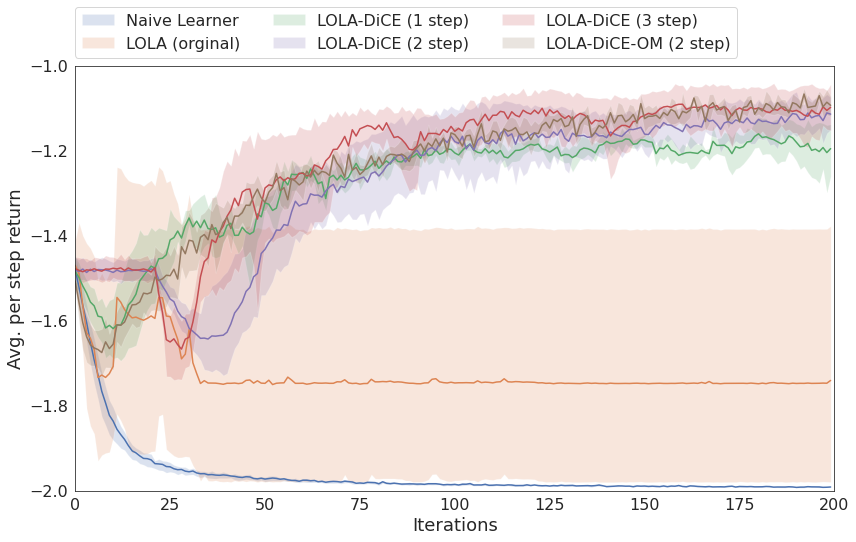

In [5]:
bs = 64

fig, ax = plt.subplots(1, 1, figsize=(12., 9.))
colors = sns.color_palette('deep')

# NL
sns.tsplot((rets_nl[bs][:, :, 0] + rets_nl[bs][:, :, 1]) / 2, color=colors[0], ci=CONFIDENCE_INTERVAL, ax=ax)

# LOLA + gradient corrections
sns.tsplot((rets_old[bs][:, :, 0] + rets_old[bs][:, :, 1]) / 2, color=colors[1], ci=CONFIDENCE_INTERVAL, ax=ax)


# LOLA + magic
sns.tsplot((rets_magic[bs][:, :, 0] + rets_magic[bs][:, :, 1]) / 2, color=colors[2], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot((rets_2steps_magic[bs][:, :, 0] + rets_2steps_magic[bs][:, :, 1]) / 2, color=colors[4], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot((rets_3steps_magic[bs][:, :, 0] + rets_3steps_magic[bs][:, :, 1]) / 2, color=colors[3], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot((rets_2steps_magic_om[bs][:, :, 0] + rets_2steps_magic_om[bs][:, :, 1]) / 2, color=colors[5], ci=CONFIDENCE_INTERVAL, ax=ax)


ax.set_xlim([0, 200])
ax.set_ylim([-2., -1.])
ax.set_ylabel("Avg. per step return")
ax.set_xlabel("Iterations")
lg = ax.legend([
    "Naive Learner",
    "LOLA (orginal)",
    "LOLA-DiCE (1 step)",
    "LOLA-DiCE (2 step)",
    "LOLA-DiCE (3 step)",
    "LOLA-DiCE-OM (2 step)",
], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=3, borderaxespad=0)

fig.tight_layout(rect=[0, 0, 1, .85])
fig.savefig("lola-results.pdf")

/home/maxime/anaconda3/envs/lola/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/maxime/anaconda3/envs/lola/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/maxime/anaconda3/envs/lola/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/maxime/anaconda3/envs/lola/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please

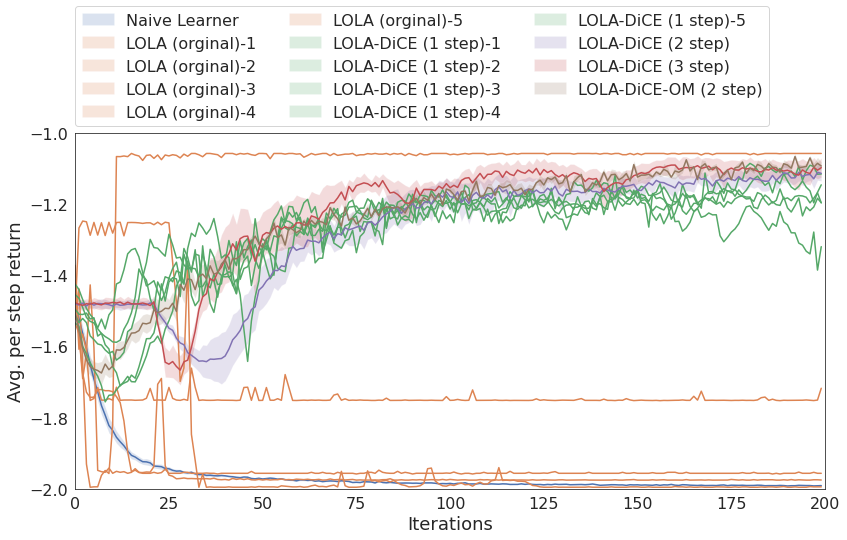

In [10]:
bs = 64

fig, ax = plt.subplots(1, 1, figsize=(12., 9.))
colors = sns.color_palette('deep')

# NL
sns.tsplot((rets_nl[bs][:, :, 0] + rets_nl[bs][:, :, 1]) / 2, color=colors[0], ci=CONFIDENCE_INTERVAL, ax=ax)

# LOLA + gradient corrections
sns.tsplot((rets_old[bs][0, :, 0] + rets_old[bs][0, :, 1]) / 2, color=colors[1], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot((rets_old[bs][1, :, 0] + rets_old[bs][1, :, 1]) / 2, color=colors[1], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot((rets_old[bs][2, :, 0] + rets_old[bs][2, :, 1]) / 2, color=colors[1], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot((rets_old[bs][3, :, 0] + rets_old[bs][3, :, 1]) / 2, color=colors[1], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot((rets_old[bs][4, :, 0] + rets_old[bs][4, :, 1]) / 2, color=colors[1], ci=CONFIDENCE_INTERVAL, ax=ax)


# LOLA + magic
sns.tsplot((rets_magic[bs][0, :, 0] + rets_magic[bs][0, :, 1]) / 2, color=colors[2], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot((rets_magic[bs][1, :, 0] + rets_magic[bs][1, :, 1]) / 2, color=colors[2], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot((rets_magic[bs][2, :, 0] + rets_magic[bs][2, :, 1]) / 2, color=colors[2], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot((rets_magic[bs][3, :, 0] + rets_magic[bs][3, :, 1]) / 2, color=colors[2], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot((rets_magic[bs][4, :, 0] + rets_magic[bs][4, :, 1]) / 2, color=colors[2], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot((rets_2steps_magic[bs][:, :, 0] + rets_2steps_magic[bs][:, :, 1]) / 2, color=colors[4], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot((rets_3steps_magic[bs][:, :, 0] + rets_3steps_magic[bs][:, :, 1]) / 2, color=colors[3], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot((rets_2steps_magic_om[bs][:, :, 0] + rets_2steps_magic_om[bs][:, :, 1]) / 2, color=colors[5], ci=CONFIDENCE_INTERVAL, ax=ax)


ax.set_xlim([0, 200])
ax.set_ylim([-2., -1.])
ax.set_ylabel("Avg. per step return")
ax.set_xlabel("Iterations")
lg = ax.legend([
    "Naive Learner",
    "LOLA (orginal)-1",
    "LOLA (orginal)-2",
    "LOLA (orginal)-3",
    "LOLA (orginal)-4",
    "LOLA (orginal)-5",
    "LOLA-DiCE (1 step)-1",
    "LOLA-DiCE (1 step)-2",
    "LOLA-DiCE (1 step)-3",
    "LOLA-DiCE (1 step)-4",
    "LOLA-DiCE (1 step)-5",
    "LOLA-DiCE (2 step)",
    "LOLA-DiCE (3 step)",
    "LOLA-DiCE-OM (2 step)",
], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=3, borderaxespad=0)

fig.tight_layout(rect=[0, 0, 1, .85])
fig.savefig("lola-results.pdf")

My runs with default hyperparameters

/home/maxime/anaconda3/envs/lola/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/maxime/anaconda3/envs/lola/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/maxime/anaconda3/envs/lola/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/maxime/anaconda3/envs/lola/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please

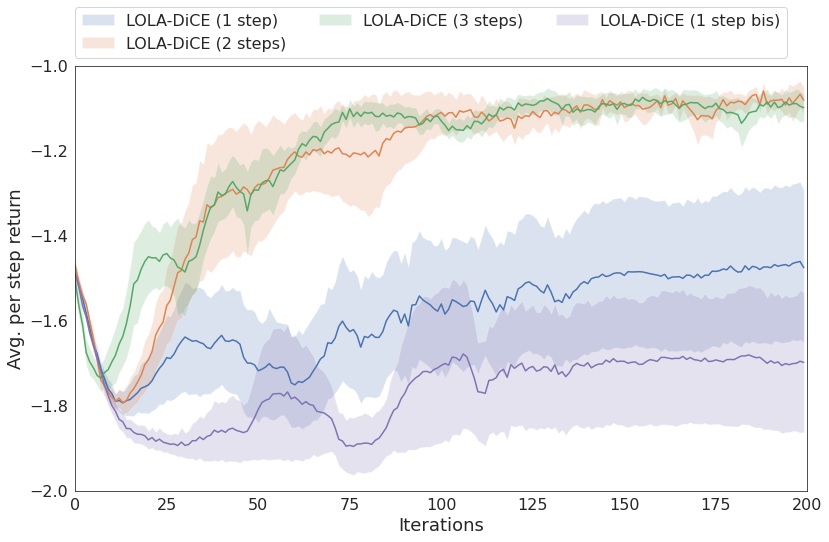

In [13]:
bs = 64

fig, ax = plt.subplots(1, 1, figsize=(12., 9.))
colors = sns.color_palette('deep')


# LOLA + magic
sns.tsplot((rets_custom_1step[bs][:, :, 0] + rets_custom_1step[bs][:, :, 1]) / 2, color=colors[0], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot((rets_custom_2step[bs][:, :, 0] + rets_custom_2step[bs][:, :, 1]) / 2, color=colors[1], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot((rets_custom_3step[bs][:, :, 0] + rets_custom_3step[bs][:, :, 1]) / 2, color=colors[2], ci=CONFIDENCE_INTERVAL, ax=ax)

# sns.tsplot((rets_custom_1step_baseline[bs][:, :, 0] + rets_custom_1step_baseline[bs][:, :, 1]) / 2, color=colors[3], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot((rets_custom_1step_bis[bs][:, :, 0] + rets_custom_1step_bis[bs][:, :, 1]) / 2, color=colors[4], ci=CONFIDENCE_INTERVAL, ax=ax)
# sns.tsplot((rets_custom_1step_default_bs_epochs[bs][:, :, 0] + rets_custom_1step_default_bs_epochs[bs][:, :, 1]) / 2, color=colors[5], ci=CONFIDENCE_INTERVAL, ax=ax)

ax.set_xlim([0, 200])
ax.set_ylim([-2., -1.])
ax.set_ylabel("Avg. per step return")
ax.set_xlabel("Iterations")
lg = ax.legend([
    "LOLA-DiCE (1 step)",
    "LOLA-DiCE (2 steps)",
    "LOLA-DiCE (3 steps)",
#     "LOLA-DiCE-cust1 baseline",
    "LOLA-DiCE (1 step bis)",
#     "LOLA-DiCE-cust1 bs_epochs",

], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=3, borderaxespad=0)

fig.tight_layout(rect=[0, 0, 1, .85])
# fig.savefig("lola-results.pdf")

/home/maxime/anaconda3/envs/lola/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/maxime/anaconda3/envs/lola/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/maxime/anaconda3/envs/lola/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/maxime/anaconda3/envs/lola/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please

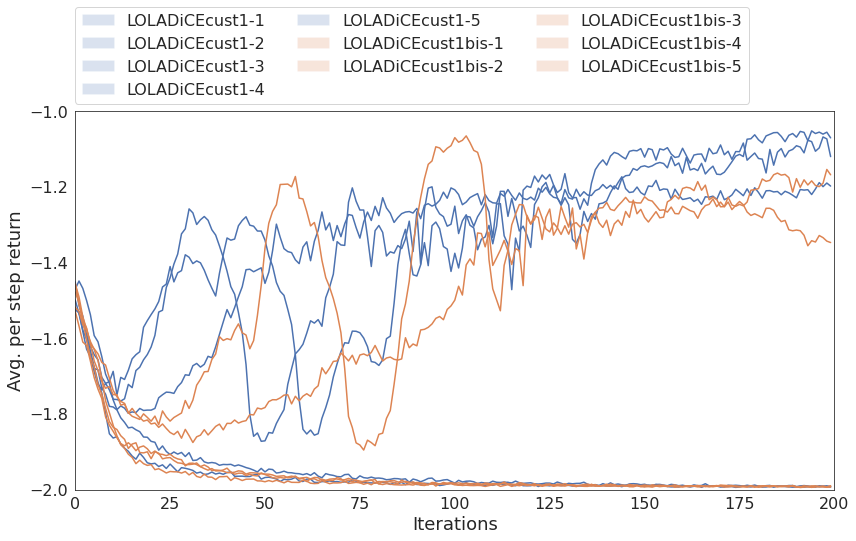

In [14]:
bs = 64

fig, ax = plt.subplots(1, 1, figsize=(12., 9.))
colors = sns.color_palette('deep')


# LOLA + magic
sns.tsplot((rets_custom_1step[bs][0, :, 0] + rets_custom_1step[bs][0, :, 1]) / 2, color=colors[0], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot((rets_custom_1step[bs][1, :, 0] + rets_custom_1step[bs][1, :, 1]) / 2, color=colors[0], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot((rets_custom_1step[bs][2, :, 0] + rets_custom_1step[bs][2, :, 1]) / 2, color=colors[0], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot((rets_custom_1step[bs][3, :, 0] + rets_custom_1step[bs][3, :, 1]) / 2, color=colors[0], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot((rets_custom_1step[bs][4, :, 0] + rets_custom_1step[bs][4, :, 1]) / 2, color=colors[0], ci=CONFIDENCE_INTERVAL, ax=ax)
# sns.tsplot((rets_custom_2step[bs][0, :, 0] + rets_custom_2step[bs][0, :, 1]) / 2, color=colors[1], ci=CONFIDENCE_INTERVAL, ax=ax)
# sns.tsplot((rets_custom_2step[bs][1, :, 0] + rets_custom_2step[bs][1, :, 1]) / 2, color=colors[1], ci=CONFIDENCE_INTERVAL, ax=ax)
# sns.tsplot((rets_custom_2step[bs][2, :, 0] + rets_custom_2step[bs][2, :, 1]) / 2, color=colors[1], ci=CONFIDENCE_INTERVAL, ax=ax)
# sns.tsplot((rets_custom_2step[bs][3, :, 0] + rets_custom_2step[bs][3, :, 1]) / 2, color=colors[1], ci=CONFIDENCE_INTERVAL, ax=ax)
# sns.tsplot((rets_custom_2step[bs][4, :, 0] + rets_custom_2step[bs][4, :, 1]) / 2, color=colors[1], ci=CONFIDENCE_INTERVAL, ax=ax)
# sns.tsplot((rets_custom_3step[bs][0, :, 0] + rets_custom_3step[bs][0, :, 1]) / 2, color=colors[2], ci=CONFIDENCE_INTERVAL, ax=ax)
# sns.tsplot((rets_custom_3step[bs][1, :, 0] + rets_custom_3step[bs][1, :, 1]) / 2, color=colors[2], ci=CONFIDENCE_INTERVAL, ax=ax)
# sns.tsplot((rets_custom_3step[bs][2, :, 0] + rets_custom_3step[bs][2, :, 1]) / 2, color=colors[2], ci=CONFIDENCE_INTERVAL, ax=ax)
# sns.tsplot((rets_custom_3step[bs][3, :, 0] + rets_custom_3step[bs][3, :, 1]) / 2, color=colors[2], ci=CONFIDENCE_INTERVAL, ax=ax)
# sns.tsplot((rets_custom_3step[bs][4, :, 0] + rets_custom_3step[bs][4, :, 1]) / 2, color=colors[2], ci=CONFIDENCE_INTERVAL, ax=ax)

sns.tsplot((rets_custom_1step_bis[bs][0, :, 0] + rets_custom_1step_bis[bs][0, :, 1]) / 2, color=colors[1], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot((rets_custom_1step_bis[bs][1, :, 0] + rets_custom_1step_bis[bs][1, :, 1]) / 2, color=colors[1], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot((rets_custom_1step_bis[bs][2, :, 0] + rets_custom_1step_bis[bs][2, :, 1]) / 2, color=colors[1], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot((rets_custom_1step_bis[bs][3, :, 0] + rets_custom_1step_bis[bs][3, :, 1]) / 2, color=colors[1], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot((rets_custom_1step_bis[bs][4, :, 0] + rets_custom_1step_bis[bs][4, :, 1]) / 2, color=colors[1], ci=CONFIDENCE_INTERVAL, ax=ax)
# sns.tsplot((rets_custom_1step_default_bs_epochs[bs][0, :, 0] + rets_custom_1step_default_bs_epochs[bs][0, :, 1]) / 2, color=colors[2], ci=CONFIDENCE_INTERVAL, ax=ax)
# sns.tsplot((rets_custom_1step_default_bs_epochs[bs][1, :, 0] + rets_custom_1step_default_bs_epochs[bs][1, :, 1]) / 2, color=colors[2], ci=CONFIDENCE_INTERVAL, ax=ax)
# sns.tsplot((rets_custom_1step_default_bs_epochs[bs][2, :, 0] + rets_custom_1step_default_bs_epochs[bs][2, :, 1]) / 2, color=colors[2], ci=CONFIDENCE_INTERVAL, ax=ax)
# sns.tsplot((rets_custom_1step_default_bs_epochs[bs][3, :, 0] + rets_custom_1step_default_bs_epochs[bs][3, :, 1]) / 2, color=colors[2], ci=CONFIDENCE_INTERVAL, ax=ax)
# sns.tsplot((rets_custom_1step_default_bs_epochs[bs][4, :, 0] + rets_custom_1step_default_bs_epochs[bs][4, :, 1]) / 2, color=colors[2], ci=CONFIDENCE_INTERVAL, ax=ax)

ax.set_xlim([0, 200])
ax.set_ylim([-2., -1.])
ax.set_ylabel("Avg. per step return")
ax.set_xlabel("Iterations")
lg = ax.legend([
    "LOLADiCEcust1-1",
    "LOLADiCEcust1-2",
    "LOLADiCEcust1-3",
    "LOLADiCEcust1-4",
    "LOLADiCEcust1-5",
#     "LOLADiCEcust2-1",
#     "LOLADiCEcust2-2",
#     "LOLADiCEcust2-3",
#     "LOLADiCEcust2-4",
#     "LOLADiCEcust2-5",
#     "LOLADiCEcust3-1",
#     "LOLADiCEcust3-2",
#     "LOLADiCEcust3-3",
#     "LOLADiCEcust3-4",
#     "LOLADiCEcust3-5",
    "LOLADiCEcust1bis-1",
    "LOLADiCEcust1bis-2",
    "LOLADiCEcust1bis-3",
    "LOLADiCEcust1bis-4",
    "LOLADiCEcust1bis-5",
#     "LOLADiCEcust1bsepochs-1",
#     "LOLADiCEcust1bsepochs-2",
#     "LOLADiCEcust1bsepochs-3",
#     "LOLADiCEcust1bsepochs-4",
#     "LOLADiCEcust1bsepochs-5",
], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=3, borderaxespad=0)

fig.tight_layout(rect=[0, 0, 1, .85])
# fig.savefig("lola-results.pdf")

# Coin Game

## Load data

In [32]:
# custom 1 step
# rets_custom_1step, times_custom_1step, params_custom_1step = {}, {}, {}
# for bs in [64]:
#     rets_custom_1step[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_1/run-%d/rets.npy" % (r + 1)) for r in range(runs)])
#     times_custom_1step[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_1/run-%d/times.npy" % (r + 1)) for r in range(runs)])
#     params_custom_1step[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_1/run-%d/params.npy" % (r + 1)) for r in range(runs)])

runs = 1
dir_name = "11_10_2020__10_28_40"
# custom 2 steps
rets_cg_custom_2step, times_cg_custom_2step, params_cg_custom_2step, pick_speed_2step = {}, {}, {}, {}
for bs in [64]:
    rets_cg_custom_2step[bs] = np.stack([np.load(f"custom_results_coin_game/{dir_name}/run-{r + 1}/rets.npy") for r in range(runs)])
    times_cg_custom_2step[bs] = np.stack([np.load(f"custom_results_coin_game/{dir_name}/run-{r + 1}/times.npy") for r in range(runs)])
    params_cg_custom_2step[bs] = np.stack([np.load(f"custom_results_coin_game/{dir_name}/run-{r + 1}/params.npy") for r in range(runs)])
    pick_speed_2step[bs] = np.stack([np.load(f"custom_results_coin_game/{dir_name}/run-{r + 1}/pick_speed.npy") for r in range(runs)])

# # custom 3 steps
# rets_custom_3step, times_custom_3step, params_custom_3step = {}, {}, {}
# for bs in [64]:
#     rets_custom_3step[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_3/run-%d/rets.npy" % (r + 1)) for r in range(runs)])
#     times_custom_3step[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_3/run-%d/times.npy" % (r + 1)) for r in range(runs)])
#     params_custom_3step[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_3/run-%d/params.npy" % (r + 1)) for r in range(runs)])
    
# # custom 1 step bis
# rets_custom_1step_bis, times_custom_1step_bis, params_custom_1step_bis = {}, {}, {}
# for bs in [64]:
#     rets_custom_1step_bis[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_1_bis/run-%d/rets.npy" % (r + 1)) for r in range(runs)])
#     times_custom_1step_bis[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_1_bis/run-%d/times.npy" % (r + 1)) for r in range(runs)])
#     params_custom_1step_bis[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_1_bis/run-%d/params.npy" % (r + 1)) for r in range(runs)])

# # custom 1 step wt default bs and epochs
# rets_custom_1step_default_bs_epochs, times_custom_1step_default_bs_epochs, params_custom_1step_default_bs_epochs = {}, {}, {}
# for bs in [64]:
#     rets_custom_1step_default_bs_epochs[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_1_default_bs_epochs/run-%d/rets.npy" % (r + 1)) for r in range(runs)])
#     times_custom_1step_default_bs_epochs[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_1_default_bs_epochs/run-%d/times.npy" % (r + 1)) for r in range(runs)])
#     params_custom_1step_default_bs_epochs[bs] = np.stack([np.load("custom_results_ipd/n_inner_steps_1_default_bs_epochs/run-%d/params.npy" % (r + 1)) for r in range(runs)])


/home/maxime/anaconda3/envs/lola/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/maxime/anaconda3/envs/lola/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


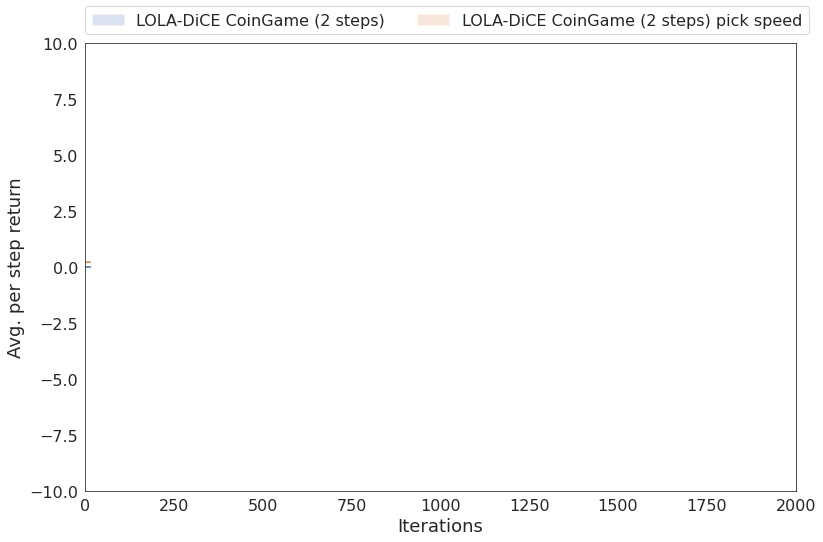

In [34]:
bs = 64

fig, ax = plt.subplots(1, 1, figsize=(12., 9.))
colors = sns.color_palette('deep')


# LOLA + magic
sns.tsplot((rets_cg_custom_2step[bs][:, :, 0] + rets_cg_custom_2step[bs][:, :, 1]) / 2, color=colors[0], ci=CONFIDENCE_INTERVAL, ax=ax)
sns.tsplot(pick_speed_2step[bs], color=colors[1], ci=CONFIDENCE_INTERVAL, ax=ax)


ax.set_xlim([0, 2000])
ax.set_ylim([-10., 10.0])
ax.set_ylabel("Avg. per step return")
ax.set_xlabel("Iterations")
lg = ax.legend([
#     "LOLA-DiCE CoinGame (1 step)",
    "LOLA-DiCE CoinGame (2 steps)",
    "LOLA-DiCE CoinGame (2 steps) pick speed",
#     "LOLA-DiCE (3 steps)",
#     "LOLA-DiCE-cust1 baseline",
#     "LOLA-DiCE (1 step bis)",
#     "LOLA-DiCE-cust1 bs_epochs",

], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=3, borderaxespad=0)

fig.tight_layout(rect=[0, 0, 1, .85])
# fig.savefig("lola-results.pdf")